In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame

In [2]:
columns=["user_id","order_dt","order_products","order_amount"]

In [3]:
df=pd.read_table("CDNOW_master.txt",names=columns,sep="\s+")

In [4]:
df["order_dt"]=pd.to_datetime(df.order_dt,format="%Y%m%d")

In [5]:
df["month"]=df.order_dt.values.astype("datetime64[M]")

In [8]:
order_diff=df.groupby("user_id").apply(lambda x:x.order_dt-x.order_dt.shift())

In [9]:
order_diff.head(10)

user_id   
1        0        NaT
2        1        NaT
         2     0 days
3        3        NaT
         4    87 days
         5     3 days
         6   227 days
         7    10 days
         8   184 days
4        9        NaT
Name: order_dt, dtype: timedelta64[ns]

In [10]:
order_diff.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: order_dt, dtype: object

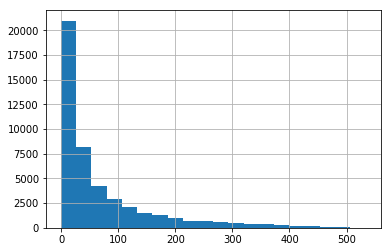

In [11]:
(order_diff/np.timedelta64(1,"D")).hist(bins=20)

In [17]:
user_life=df.groupby("user_id").order_dt.agg(["min","max"])

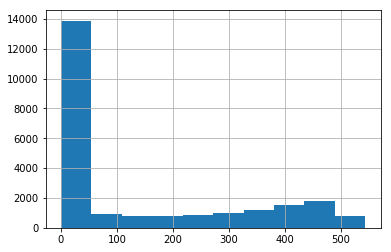

In [30]:
((user_life["max"]-user_life["min"])/np.timedelta64(1,"D")).hist(bins=10)

In [32]:
a=(user_life["max"]-user_life["min"])/np.timedelta64(1,"D")

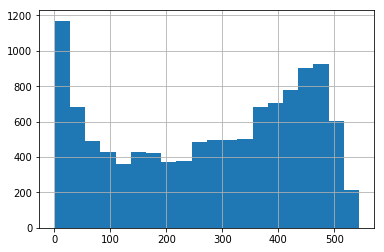

In [36]:
a[a>0].hist(bins=20)

In [50]:
pivoted_counts=df.pivot_table(index="user_id",columns="month",values="order_amount",aggfunc="count").fillna(0)

In [53]:
purchase_r=pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)

In [54]:
purchase_r.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


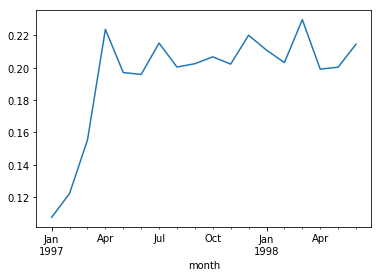

In [55]:
(purchase_r.sum()/purchase_r.count()).plot()

In [56]:
df_purchase=pivoted_counts.applymap(lambda x:1 if x>0 else 0)

In [57]:
df_purchase.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [58]:
def purchase_back(data):
    status=[]
    for i in range(17):
        if data[i]==1:
            if data[i+1]==1:
                status.append(1)
            else:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status

In [60]:
a=df_purchase.apply(purchase_back,axis=1)

In [96]:
a.head()
a.values.tolist()

[[0,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [0,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [0,
  nan,
  1,
  0,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  0,
  nan,
  nan,
  nan,
  nan,
  nan,
  0,
  nan],
 [0,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  0,
  nan,
  nan,
  nan,
  0,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [1, 0, nan, 1, 1, 1, 0, nan, 0, nan, nan, 1, 0, nan, nan, nan, nan, nan],
 [0,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [0,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  0,
  nan,
  nan,
  nan,
  nan,
  0,
  nan,
  nan,
  nan],
 [1, 0, nan, nan, nan, 1, 0, nan, nan, nan, 1, 0, nan, nan, 0, nan, nan, nan],
 [0,
  nan,
  nan,
  nan,
  0,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  na

In [63]:
dict_month = {'user_id':a.index,'numbers':a.values}

In [64]:
df_month = pd.DataFrame(dict_month)

In [80]:
b=df_month["numbers"].tolist()

In [84]:
c=DataFrame(b)

In [88]:
c.columns=df_purchase.columns

In [86]:
df_purchase.columns

DatetimeIndex(['1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01'],
              dtype='datetime64[ns]', name='month', freq=None)

In [91]:
c

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
7,1.0,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
8,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


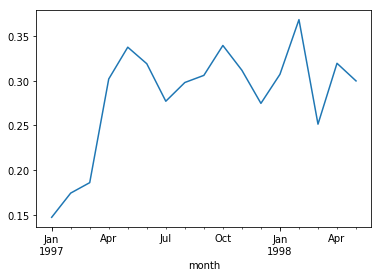

In [92]:
(c.sum()/c.count()).plot()